In [23]:
import pandas as pd
import pyarrow
import geopandas
import matplotlib.pyplot as plt

In [24]:
# from parquet to csv
file = pd.read_parquet('../../finalproj_data/input_data/newdata_v1.parquet', engine = 'pyarrow')

In [25]:
cols = list(file.columns)[2:]

In [26]:
gdf = geopandas.GeoDataFrame(
    file, geometry=geopandas.points_from_xy(file.lon, file.lat))

In [27]:
gdf.head()

,lat,lon,MaxFRP,EVI,EVI2,NVDI,NIR_reflectance,SWIR1_reflectance,SWIR2_reflectance,SWIR3_reflectance,...,SoilTMP10_40cm_inst,SoilTMP40_100cm_inst,Swnet_tavg,Tair_f_inst,Tveg_tavg,Wind_f_inst,Uncertainty,QA,label,geometry
0,-48.868351,84.172142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cloud,POINT (84.17214 -48.86835)
1,-48.868351,84.262077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cloud,POINT (84.26208 -48.86835)
2,-48.868351,84.352011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cloud,POINT (84.35201 -48.86835)
3,-48.868351,84.441945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cloud,POINT (84.44195 -48.86835)
4,-48.868351,84.531880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cloud,POINT (84.53188 -48.86835)


C:\Users\allis\Anaconda3\envs\merging\lib\site-packages\geopandas\plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


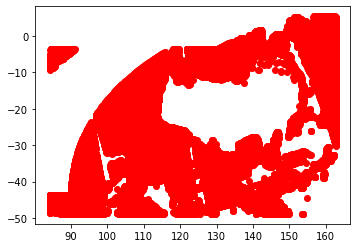

In [30]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Australia'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf[gdf['label']=='water'].plot(ax=ax, color='red')

plt.show()